Import thư viện

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Tạo dữ liệu giả

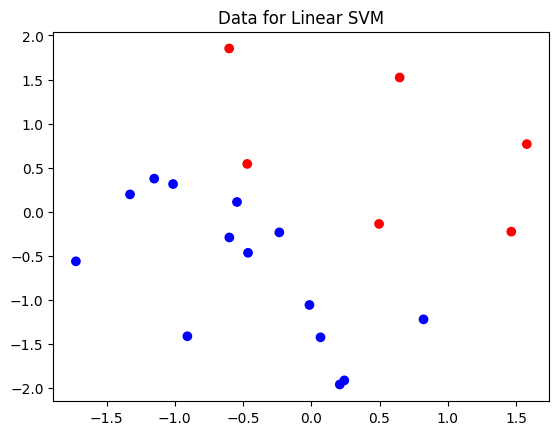

In [8]:
np.random.seed(42)
X = np.random.randn(20, 2)
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.title("Data for Linear SVM")
plt.show()

Vòng lặp huấn luyện bằng Gradient Descent:<br>
Với mỗi mẫu x_i:<br>
Tính giá trị: condition xem mẫu có nằm đúng margin không, CT: y_i(w^T.dot(x_i) + b)<br>
Nếu kết quả ≥ 1 → mẫu nằm đúng vùng biên (không vi phạm margin) không bị phạt (loss = 0)<br>
Nếu < 1 → vi phạm margin hoặc bị phân sai: bị phạt (loss = 1 - y_i(w^T x_i + b)) (hinge loss)<br>
Hàm hinge loss sẽ đạo hàm riêng từng phần:<br>
Phần regularization: khi đạo hàm còn lamda * w<br>
Phần hinge loss (nếu vi phạm): khi đạo hàm còn -y_i.dot(x_i)<br>
Kết hợp lại nếu:<br>
Không vi phạm: gradient w = lambda * w<br>
Vi phạm: gradient w = lambda * w - y_i.dot(x_i)<br>
Đạo hàm theo b:<br>
Phần regularization = 0<br>
Phần hinge loss = -y_i<br>
Tuỳ vào điều kiện sẽ tính gradient của w và b khác nhau cuối cùng dùng gradient cập nhật tham số

In [9]:
class SVM:
    def __init__(self,learning_rate=0.001, lambda_param=0.01, epochs=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.epochs = epochs
        self.w = None
        self.b = None
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                condition = y[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    dw = 2 * self.lambda_param * self.w
                    db = 0
                else:
                    dw = 2 * self.lambda_param * self.w - np.dot(x_i, y[idx])
                    db = -y[idx]
                self.w -= self.lr * dw
                self.b -= self.lr * db
    def predict(self, X):
        linear_output = np.dot(X, self.w) + self.b
        return np.sign(linear_output)

Huấn luyện và dự đoán

In [10]:
svm = SVM(learning_rate=0.01, lambda_param=0.01, epochs=1000)
svm.fit(X, y)
predictions = svm.predict(X)

Đánh giá độ chính xác tổng quát, CT: (TP + TN) / ALL

In [11]:
accuracy = np.mean(predictions == y)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.00%


Trực quan mô hình sau khi đã thực hiện vẽ đường phân tách tốt nhất

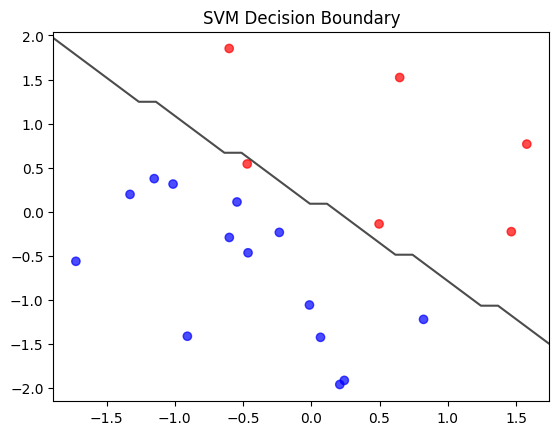

In [12]:
def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.predict(xy).reshape(XX.shape)

    plt.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.7, linestyles=['-'])
    plt.title("SVM Decision Boundary")
    plt.show()

plot_decision_boundary(X, y, svm)